In [52]:
import random 
import numpy as np 
from PIL import Image 
import torch.optim as optim 
import torch.nn as nn 
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F



from torch.utils.data import DataLoader , Dataset 
from torchvision.transforms import Compose , Normalize 
from image_classification import generate_dataset 
from helpers import index_splitter, make_balanced_sampler 
from v1 import StepByStep 



In [53]:
from PIL import Image 
from torchvision import transforms 

image = Image.open('img.jpeg')
transform = transforms.ToTensor()
img_tensor= transform(image)
img_tensor

tensor([[[0.9922, 1.0000, 1.0000,  ..., 0.9882, 1.0000, 1.0000],
         [0.9843, 0.9843, 0.9804,  ..., 0.9765, 1.0000, 1.0000],
         [0.9647, 0.9529, 0.9412,  ..., 0.9569, 0.9843, 0.9843],
         ...,
         [0.3529, 0.3569, 0.3529,  ..., 0.6039, 0.6039, 0.6039],
         [0.4510, 0.3647, 0.3294,  ..., 0.6078, 0.6275, 0.6275],
         [0.4510, 0.3647, 0.3294,  ..., 0.6078, 0.6275, 0.6275]],

        [[0.9804, 0.9961, 0.9843,  ..., 0.9725, 1.0000, 1.0000],
         [0.9647, 0.9647, 0.9529,  ..., 0.9608, 0.9843, 0.9843],
         [0.9294, 0.9176, 0.9059,  ..., 0.9412, 0.9686, 0.9686],
         ...,
         [0.1176, 0.1216, 0.1176,  ..., 0.5373, 0.5451, 0.5451],
         [0.2157, 0.1294, 0.0941,  ..., 0.5412, 0.5686, 0.5686],
         [0.2157, 0.1294, 0.0941,  ..., 0.5412, 0.5686, 0.5686]],

        [[0.8510, 0.8667, 0.8588,  ..., 0.9373, 0.9647, 0.9647],
         [0.8392, 0.8471, 0.8392,  ..., 0.9255, 0.9490, 0.9490],
         [0.8157, 0.8039, 0.7922,  ..., 0.9059, 0.9333, 0.

In [54]:
img_tensor.shape

torch.Size([3, 266, 474])

In [55]:
#nomalize 
normalize = transforms.Normalize(mean = 0.5 , std = 0.5)
normalized_img = normalize(img_tensor)
normalized_img

tensor([[[ 0.9843,  1.0000,  1.0000,  ...,  0.9765,  1.0000,  1.0000],
         [ 0.9686,  0.9686,  0.9608,  ...,  0.9529,  1.0000,  1.0000],
         [ 0.9294,  0.9059,  0.8824,  ...,  0.9137,  0.9686,  0.9686],
         ...,
         [-0.2941, -0.2863, -0.2941,  ...,  0.2078,  0.2078,  0.2078],
         [-0.0980, -0.2706, -0.3412,  ...,  0.2157,  0.2549,  0.2549],
         [-0.0980, -0.2706, -0.3412,  ...,  0.2157,  0.2549,  0.2549]],

        [[ 0.9608,  0.9922,  0.9686,  ...,  0.9451,  1.0000,  1.0000],
         [ 0.9294,  0.9294,  0.9059,  ...,  0.9216,  0.9686,  0.9686],
         [ 0.8588,  0.8353,  0.8118,  ...,  0.8824,  0.9373,  0.9373],
         ...,
         [-0.7647, -0.7569, -0.7647,  ...,  0.0745,  0.0902,  0.0902],
         [-0.5686, -0.7412, -0.8118,  ...,  0.0824,  0.1373,  0.1373],
         [-0.5686, -0.7412, -0.8118,  ...,  0.0824,  0.1373,  0.1373]],

        [[ 0.7020,  0.7333,  0.7176,  ...,  0.8745,  0.9294,  0.9294],
         [ 0.6784,  0.6941,  0.6784,  ...,  0

In [57]:
#printing back  
transform_to_pil = transforms.ToPILImage()

#back to image
normalize_img_show = transform_to_pil(normalized_img)
normalize_img_show.show()


In [58]:
a = np.zeros((3,3))
a[: , :] = [0,1,2]
a

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [59]:
torch.zeros(3,3,3,3)

tensor([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]])

In [60]:
kernal_identity = torch.eye(3,3)
kernal_identity

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [61]:
img_tensor.shape

torch.Size([3, 266, 474])

In [62]:
torch.ones(1, 1, 3, 3)  # (out_channels, in_channels, kernel_height, kernel_width)


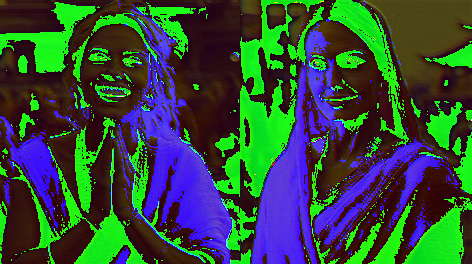

In [63]:
kernel = torch.ones(1, 1, 3, 3)  # (out_channels, in_channels, kernel_height, kernel_width)
conv = nn.Conv2d(
  in_channels=3, out_channels=3, kernel_size=3, stride=1
)
img_tensor = img_tensor.unsqueeze(0)
img_conv_tensor = conv(img_tensor)
img_conv_tensor

transforms.ToPILImage()(img_conv_tensor[0 , : , : , : ])



In [64]:
img_conv_tensor[0,: , : , : ].shape

torch.Size([3, 264, 472])

In [65]:
with torch.no_grad():
    conv.weight[0] = kernal_identity 
    conv.bias[0] = 0 


In [66]:
identity_img_conv = conv(img_tensor)
identity_img_conv

tensor([[[[ 8.2588e+00,  8.3098e+00,  8.3255e+00,  ...,  8.5647e+00,
            8.6471e+00,  8.7176e+00],
          [ 8.0275e+00,  8.0431e+00,  8.0549e+00,  ...,  8.4353e+00,
            8.5294e+00,  8.6118e+00],
          [ 7.7098e+00,  7.6941e+00,  7.6549e+00,  ...,  8.3529e+00,
            8.4353e+00,  8.5294e+00],
          ...,
          [ 1.8667e+00,  2.0941e+00,  2.5529e+00,  ...,  4.9216e+00,
            4.9255e+00,  4.9412e+00],
          [ 1.6431e+00,  1.9059e+00,  2.3765e+00,  ...,  4.9333e+00,
            5.0431e+00,  5.0471e+00],
          [ 1.6078e+00,  1.7529e+00,  2.2706e+00,  ...,  4.9098e+00,
            5.0784e+00,  5.1412e+00]],

         [[ 3.0361e-01,  3.0598e-01,  3.0143e-01,  ...,  2.9326e-01,
            3.0694e-01,  3.0201e-01],
          [ 2.9502e-01,  3.0276e-01,  3.0542e-01,  ...,  2.8641e-01,
            3.0405e-01,  2.9667e-01],
          [ 2.9166e-01,  2.9336e-01,  2.8861e-01,  ...,  2.7291e-01,
            2.9247e-01,  2.8528e-01],
          ...,
     

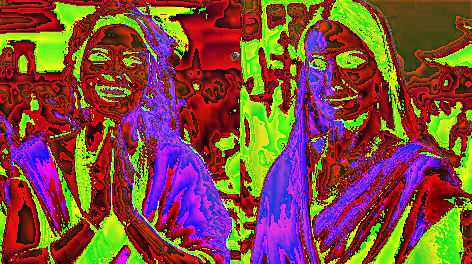

In [67]:
#to image
identity_cov_img = transforms.ToPILImage()(identity_img_conv[0, : , : , : ])
identity_cov_img

In [68]:
identity_img_conv.shape

torch.Size([1, 3, 264, 472])

In [69]:
#PADDING  SAVING THE IMAGES



In [70]:
constant_padder = nn.ConstantPad1d(padding= 1 , value = 0)
constant_padder(img_tensor)

tensor([[[[0.0000, 0.9922, 1.0000,  ..., 1.0000, 1.0000, 0.0000],
          [0.0000, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 0.0000],
          [0.0000, 0.9647, 0.9529,  ..., 0.9843, 0.9843, 0.0000],
          ...,
          [0.0000, 0.3529, 0.3569,  ..., 0.6039, 0.6039, 0.0000],
          [0.0000, 0.4510, 0.3647,  ..., 0.6275, 0.6275, 0.0000],
          [0.0000, 0.4510, 0.3647,  ..., 0.6275, 0.6275, 0.0000]],

         [[0.0000, 0.9804, 0.9961,  ..., 1.0000, 1.0000, 0.0000],
          [0.0000, 0.9647, 0.9647,  ..., 0.9843, 0.9843, 0.0000],
          [0.0000, 0.9294, 0.9176,  ..., 0.9686, 0.9686, 0.0000],
          ...,
          [0.0000, 0.1176, 0.1216,  ..., 0.5451, 0.5451, 0.0000],
          [0.0000, 0.2157, 0.1294,  ..., 0.5686, 0.5686, 0.0000],
          [0.0000, 0.2157, 0.1294,  ..., 0.5686, 0.5686, 0.0000]],

         [[0.0000, 0.8510, 0.8667,  ..., 0.9647, 0.9647, 0.0000],
          [0.0000, 0.8392, 0.8471,  ..., 0.9490, 0.9490, 0.0000],
          [0.0000, 0.8157, 0.8039,  ..., 0

In [71]:
padded = F.pad(img_tensor, pad = (1,1,1,1) , mode = 'constant' , value = 0 )

In [32]:
padded

tensor([[[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.9922, 1.0000,  ..., 1.0000, 1.0000, 0.0000],
           [0.0000, 0.9843, 0.9843,  ..., 1.0000, 1.0000, 0.0000],
           ...,
           [0.0000, 0.4510, 0.3647,  ..., 0.6275, 0.6275, 0.0000],
           [0.0000, 0.4510, 0.3647,  ..., 0.6275, 0.6275, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.9804, 0.9961,  ..., 1.0000, 1.0000, 0.0000],
           [0.0000, 0.9647, 0.9647,  ..., 0.9843, 0.9843, 0.0000],
           ...,
           [0.0000, 0.2157, 0.1294,  ..., 0.5686, 0.5686, 0.0000],
           [0.0000, 0.2157, 0.1294,  ..., 0.5686, 0.5686, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

          [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.8510, 0.8667,  ..., 0.9647, 0.9647, 0.0000],
           [0.0000, 0.8392

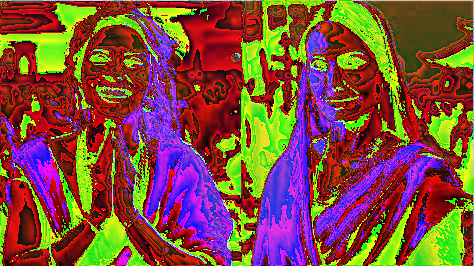

In [72]:
transforms.ToPILImage()(conv(padded)[0, : , : , :])

In [34]:
## real filter

In [73]:
img_tensor.shape

torch.Size([1, 3, 266, 474])

In [74]:
img_tensor.shape

torch.Size([1, 3, 266, 474])

In [75]:
import torch
import torch.nn.functional as F

edge = torch.tensor([[[[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]]]], dtype=torch.float32)


edge_detected = [] 
for channel in range(3):
    channel_data = img_tensor[:,channel:channel+1, : , :] 
    edge_channel = F.conv2d(input=channel_data, weight= edge, padding= 0)
    edge_detected.append(edge_channel)

#combine the channel
edge_detected = torch.cat(edge_detected, dim=1)


In [76]:
avg_blur = torch.tensor([[[[100, 100, 120],
                           [1/9, 1/9, 1/9],
                           [100, 800, 1/9]]]], dtype=torch.float32)


In [77]:
import torch 
import torch.nn.functional as F
blur = [] 
for channel in range(3):
    chnnel_data = img_tensor[:, channel:channel+1, : , :]
    blur_images = F.conv2d(input = channel_data , weight= avg_blur, padding=0)
    blur.append(blur_images)
#combine the channel 
blur_image = torch.cat(blur, dim = 1)
    

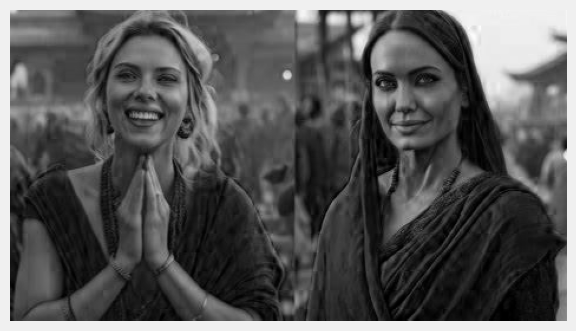

In [78]:
import matplotlib.pyplot as plt

# Normalize to 0-1 range
blur_img_norm = (blur_image - blur_image.min()) / (blur_image.max() - blur_image.min())

# Convert to numpy array and move channel dimension
edge_detected_image = blur_img_norm.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Display the image
plt.imshow(edge_detected_image)
plt.axis('off')
plt.show()

In [98]:
transforms.Normalize(mean=(0.5) , std=(0.5))(img_tensor).shape

torch.Size([1, 3, 266, 474])

torch.Size([1, 3, 266, 474])


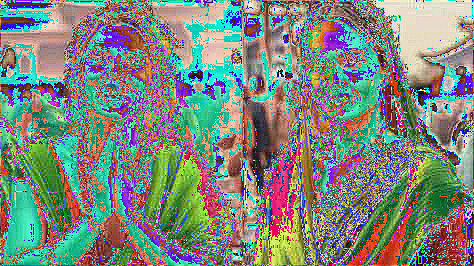

In [102]:
sharpen = torch.tensor([[[[ 0, -1,  0],
                          [-1,  5, -1],
                          [ 0, -1,  0]]]], dtype=torch.float32)

image = Image.open('img.jpeg')
transform = transforms.ToTensor()
img_tensor= transform(image)

#normaize 
img_tensor= transforms.Normalize(mean=(0.5) , std=(0.5))(img_tensor)

#create a channel 
img_tensor= img_tensor.unsqueeze(0)

filter = sharpen 
filtered_images= []
print(img_tensor.shape)
for channel in range(3):
    channel_data = img_tensor[: , channel:channel+1 , : , : ]
    filtered_channel = F.conv2d(input= channel_data, weight=filter ,padding= 1)
    filtered_images.append(filtered_channel)

    

filtered_images = torch.cat(filtered_images, dim=1)

transform_to_pil(filtered_images.squeeze())

In [93]:
filtered_images.squeeze().shape

torch.Size([3, 266, 474])

In [81]:
# Convert tensor to PIL image
def tensor_to_pil(tensor):
    # Convert tensor to numpy array and normalize
    np_image = tensor.squeeze().numpy()
    np_image = np.moveaxis(np_image, 0, -1)  # Move channel dimension to the last axis
    np_image = (np_image - np_image.min()) / (np_image.max() - np_image.min())  # Normalize to 0-1
    # Convert to PIL Image
    pil_image = Image.fromarray((np_image * 255).astype(np.uint8))
    return pil_image

# Extract each channel and display
original_image = tensor_to_pil(img_tensor[0])  # Original image
filtered_image = tensor_to_pil(filtered_images[0])  # Filtered image

# Display the images
original_image.show(title='Original Color Image')
filtered_image.show(title='Filtered Color Image')

In [82]:
import torch
import torch.nn.functional as F

edge = torch.tensor([[[[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]]]], dtype=torch.float32)



In [83]:
# Assuming your image tensor is named 'image'
# image shape: [1, 3, 266, 474]

# Apply edge detection to each channel
edge_detected = []
for channel in range(3):
    channel_data = img_tensor[:, channel:channel+1, :, :]
    edge_channel = F.conv2d(input = channel_data, weight= edge, padding=0)
    edge_detected.append(edge_channel)

# Combine the channels
edge_detected = torch.cat(edge_detected, dim=1)

# The resulting edge_detected tensor will have the same shape as your input image
print(edge_detected.shape)  # Should be torch.Size([1, 3, 266, 474])

torch.Size([1, 3, 264, 472])


In [84]:
import matplotlib.pyplot as plt

# Normalize to 0-1 range
blu = (edge_detected - edge_detected.min()) / (edge_detected.max() - edge_detected.min())

# Convert to numpy array and move channel dimension

blur_image = edge_detected_norm.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Display the image
plt.imshow(edge_detected_image)
plt.axis('off')
plt.show()

NameError: name 'edge_detected_norm' is not defined

In [47]:

edge_channel.shape

NameError: name 'edge_channel' is not defined

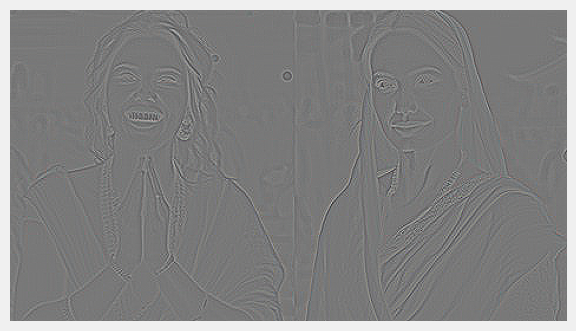

In [85]:
import matplotlib.pyplot as plt

# Normalize to 0-1 range
edge_detected_norm = (edge_detected - edge_detected.min()) / (edge_detected.max() - edge_detected.min())

# Convert to numpy array and move channel dimension
edge_detected_image = edge_detected_norm.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Display the image
plt.imshow(edge_detected_image)
plt.axis('off')
plt.show()

In [86]:
import torch
import torch.nn.functional as F

identity = torch.tensor([[[[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]]]], dtype=torch.float32)

In [87]:
# Assuming your image tensor is named 'image' with shape [1, 3, 266, 474]

# Apply identity convolution to each channel
identity_filtered = []
for channel in range(3):
    channel_data = img_tensor[:, channel:channel+1, :, :]
    identity_channel = F.conv2d(channel_data, identity, padding=1)
    identity_filtered.append(identity_channel)

# Combine the channels
identity_filtered = torch.cat(identity_filtered, dim=1)

print(identity_filtered.shape)  # Should be torch.Size([1, 3, 266, 474])

torch.Size([1, 3, 266, 474])


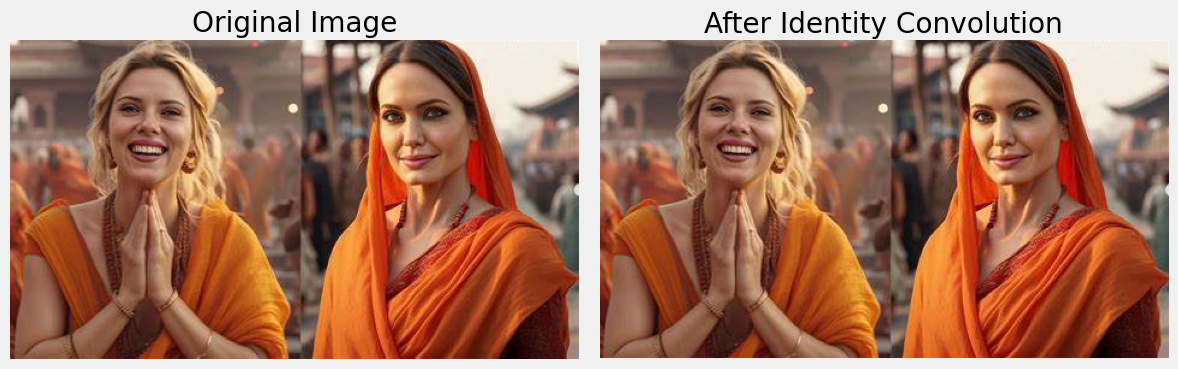

In [88]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Assuming your image tensor is named 'image' with shape [1, 3, 266, 474]

# Create identity kernel
identity = torch.tensor([[[[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]]]], dtype=torch.float32)

# Apply identity convolution to each channel
identity_filtered = []
for channel in range(3):
    channel_data = img_tensor[:, channel:channel+1, :, :]
    identity_channel = F.conv2d(channel_data, identity, padding=0)
    identity_filtered.append(identity_channel)

# Combine the channels
identity_filtered = torch.cat(identity_filtered, dim=1)

# Convert tensors to numpy arrays for displaying
original_image = img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
filtered_image = identity_filtered.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(original_image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(filtered_image)
ax2.set_title('After Identity Convolution')
ax2.axis('off')

plt.tight_layout()
plt.show()